<a href="https://colab.research.google.com/github/hasanj0n/Data_Science/blob/main/Aviaticket_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aviachipta narxini bashorat qilish

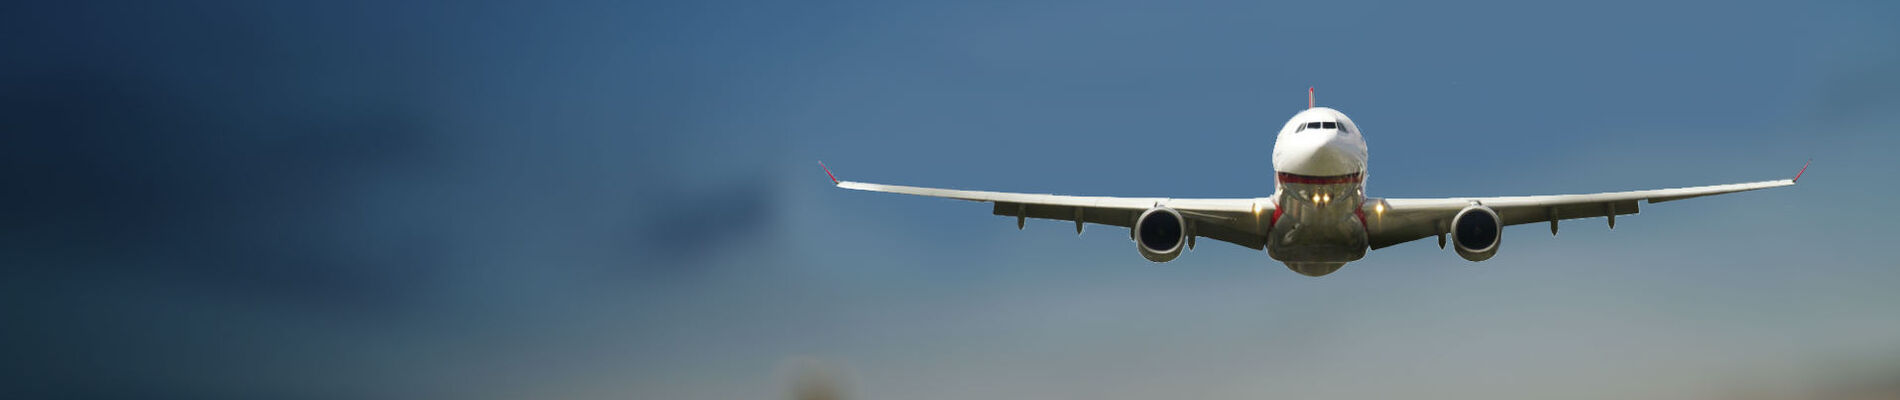

**Dataset Description**

Ushbu maʼlumotlar toʻplami quyidagilarni o'z ichiga oladi:

Tarkib:

**ID:** Ketma - ketlik uchun qo'yilgan sonlar.

**Airline:** Parvoz qilingan aviakompaniya nomi.

**Flight:** Parvoz qilingan ID raqami.

**Source_city:** Parvoz qaysi shahardan boshlanishi.

**Departure_time:** Samolyotning ketish vaqti.

**Stop:** Parvoz davomida to'xtashlar soni.

**Arrival_time:** Qaytish vaqti.

**Destination_city:** Qaysi davlatga parvoz qilinayotgani.

**Class:** Foydalanuvchi samolyotning qaysi klass turidan foydalanib uchganligi.

**Duration:** Parvoz davomiyligi.

**Days_left:** Samolyotning qancha vaqtdan keyin qaytishi.

### Kerakli kutubxonalarni chaqirib olamiz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error , mean_squared_error

### Ma'lumitlarni Git Hubdan yuklab olamiz!

In [2]:
# !git clone https://github.com/hasanj0n/Datasets

In [3]:
train_set = pd.read_csv("/content/Datasets/AviaTicket_price_datasets/train_data.csv")
x_test = pd.read_csv("/content/Datasets/AviaTicket_price_datasets/test_data.csv")
sample = pd.read_csv("/content/Datasets/AviaTicket_price_datasets/sample_solution.csv")
train_set.drop("id", axis=1, inplace=True)
x_test.drop("id", axis=1, inplace=True)
train_set

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...,...
19995,Indigo,6E-6178,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,AirAsia,I5-582,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,Vistara,UK-832,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


Bu quyidagi kod, modellarni tekshirib ko'rish uchun

In [4]:
# df = pd.read_csv("/content/Datasets/AviaTicket_price_datasets/train_data.csv")
# df.drop("id", axis=1, inplace=True)
# sample = pd.read_csv("/content/Datasets/AviaTicket_price_datasets/sample_solution.csv")

# train_set, test_set = train_test_split(df, random_state=42, test_size=0.2)
# x_test = test_set.drop("price", axis=1)
# y_test = test_set.price

In [5]:
x_test

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35
...,...,...,...,...,...,...,...,...,...,...
4995,Air_India,AI-768,Kolkata,Afternoon,one,Morning,Bangalore,Business,17.42,15
4996,Indigo,6E-6214,Kolkata,Morning,zero,Afternoon,Mumbai,Economy,3.00,40
4997,Air_India,AI-402,Kolkata,Morning,one,Night,Mumbai,Business,11.17,37
4998,Air_India,AI-673,Mumbai,Early_Morning,one,Night,Hyderabad,Business,13.33,38


In [6]:
sample

,id,price
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4995,4996,0
4996,4997,0
4997,4998,0
4998,4999,0


### Dataset haqida umumiy malumotlar

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.7+ MB


Bizda 3 ta ustun raqamli ustunlar qolganlari matnli ustunlar

### Malumotlarga ishlov berish

In [8]:
# duplicated qiymatlar
duplicated_rows=train_set[train_set.drop(["price"], axis=1).duplicated()]
duplicated_rows

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
8829,Vistara,UK-706,Kolkata,Morning,two_or_more,Evening,Chennai,Economy,33.67,29,16590
11121,Vistara,UK-720,Kolkata,Early_Morning,one,Evening,Chennai,Economy,12.75,3,23604
11674,Vistara,UK-836,Chennai,Morning,one,Night,Hyderabad,Economy,10.17,33,7697
13284,Air_India,AI-809,Mumbai,Morning,one,Morning,Hyderabad,Economy,23.92,30,5625
14570,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Delhi,Economy,9.75,39,7351
15080,Air_India,AI-9517,Bangalore,Evening,one,Night,Mumbai,Economy,26.75,36,6191
17669,Air_India,AI-424,Kolkata,Afternoon,one,Morning,Hyderabad,Economy,21.00,4,11175
18159,Vistara,UK-812,Bangalore,Morning,one,Morning,Mumbai,Economy,25.75,12,14867
18402,Air_India,AI-424,Kolkata,Afternoon,one,Evening,Hyderabad,Economy,29.83,4,11175
18433,Vistara,UK-706,Kolkata,Morning,two_or_more,Evening,Chennai,Economy,33.67,22,16552


In [9]:
# Duplicated qiymatlarni tashlab yuboramiz
train_set.drop(duplicated_rows.index, inplace=True)

In [10]:
# Nan qiymatlar soni
train_set.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Vizualizatsiya yordamida malumotlarni tahlil qilish

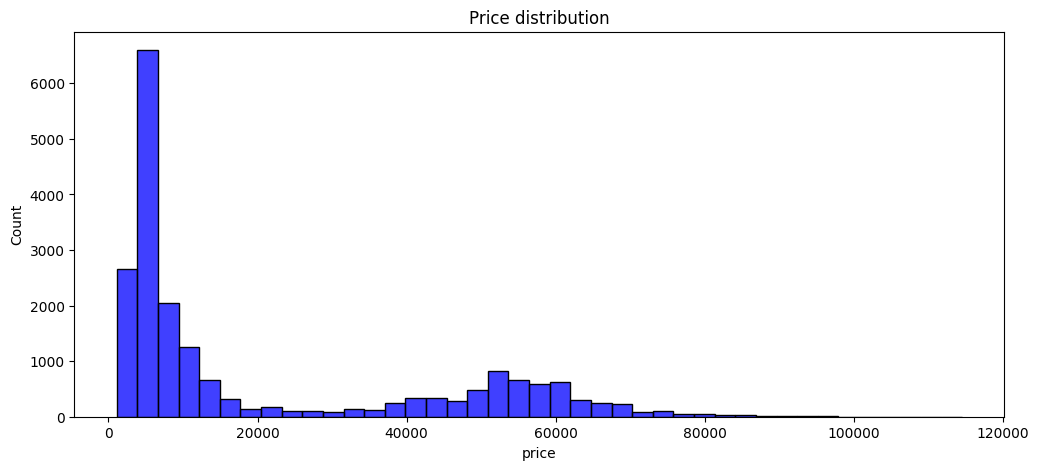

In [11]:
plt.figure(figsize=[12,5])
plt.title("Price distribution")
sns.histplot(train_set,x="price", color="b")
plt.show()


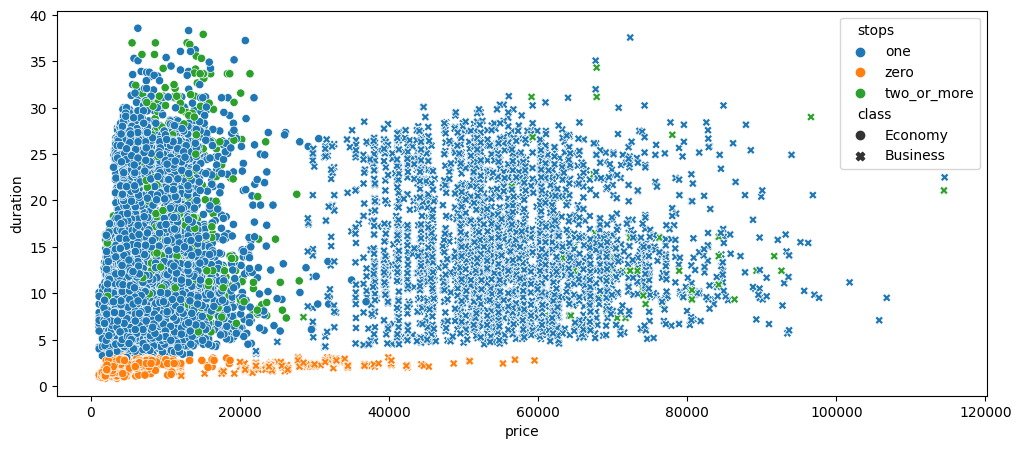

In [12]:
plt.figure(figsize=[12,5])
sns.scatterplot(train_set,x="price", y="duration", hue="stops", style="class")
plt.show()


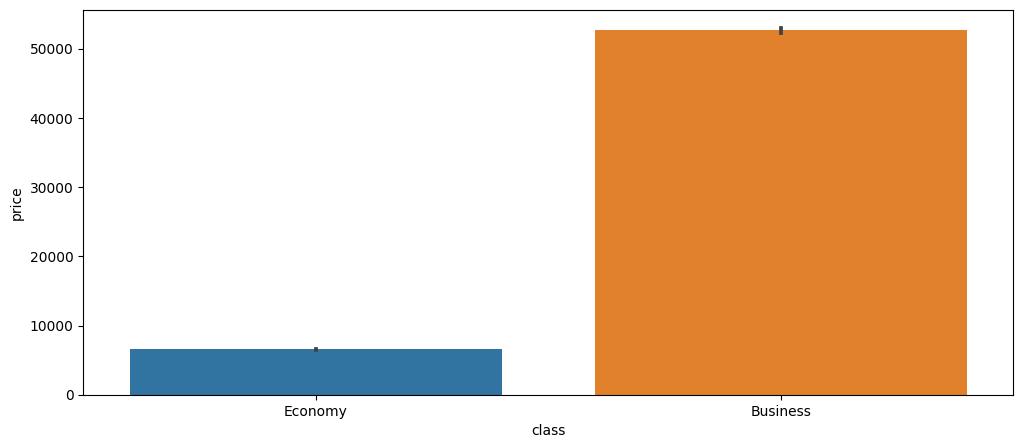

In [13]:
plt.figure(figsize=[12,5])
sns.barplot(train_set, x="class",y="price")
plt.show()

### Malumotlarni Machine Learningga tayyorlash

In [14]:
x_train = train_set.drop("price", axis=1)
y_train = train_set[["price"]]
y_train

,price
0,7212
1,5292
2,60553
3,5760
4,10712
...,...
19995,3153
19996,3911
19997,14822
19998,6450


In [15]:
# "stops" ustunini songa o'zgartiramiz
dct = {"one":1,"zero":0,"two_or_more":2}
x_train.stops=train_set.stops.map(dct)
x_test.stops=x_test.stops.map(dct)

In [16]:
# Qolgan matnli ustunlarni ham sonli ustunlarga o'zgartiramiz
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [17]:
x_train

,stops,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,1,14.25,21,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
1,0,1.75,7,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
2,1,9.58,5,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,6.75,28,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,0,2.00,4,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,7.92,45,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
19996,1,5.83,24,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
19997,2,35.33,17,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
19998,1,16.33,21,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


In [18]:
x_test

,stops,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,1,28.25,2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,13.83,34,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,0,2.00,30,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,5.17,26,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,16.33,35,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,17.42,15,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4996,0,3.00,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4997,1,11.17,37,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4998,1,13.33,38,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [19]:
common_columns = x_train.columns.intersection(x_test.columns)

In [20]:
x_train=x_train[common_columns]
x_test=x_test[common_columns]

In [21]:
std_scaler = StandardScaler()

In [22]:
# Ma'lumotlarni standartlash
# x_train = std_scaler.fit_transform(x_train)
# x_test = std_scaler.fit_transform(x_test)

### Machine Learning

####Linear Regression

In [23]:
lr_model = LinearRegression()


# training
lr_model.fit(x_train, y_train)

# predicting
y_pred = lr_model.predict(x_test)





# evaluation
# mae = mean_absolute_error(y_test, y_pred)
# mae

In [24]:
y_pred

array([[55260.4375  ],
       [57318.9375  ],
       [39957.09375 ],
       ...,
       [51979.328125],
       [45988.71875 ],
       [52157.953125]])

#### Decision Tree

In [25]:
tree_model = DecisionTreeRegressor()


# training
tree_model.fit(x_train, y_train)

# predicting
y_pred = tree_model.predict(x_test)




# evaluation
# mae = mean_absolute_error(y_test, y_pred)
# mae

In [26]:
y_pred

array([60175., 59033., 23484., ..., 50271., 50868., 66063.])

#### Random Forest

In [27]:
rf_model = RandomForestRegressor()


# training
rf_model.fit(x_train, y_train)

# predicting
y_pred = rf_model.predict(x_test)





# evaluation
# mae = mean_absolute_error(y_test, y_pred)
# mae

<ipython-input-27-142c6bd0ca84>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train, y_train)


### Javobni csv filega yuklab olish

In [28]:
y_pred

array([51392.57, 62384.72, 23454.88, ..., 50271.  , 50505.75, 65619.17])

In [29]:
x_test

,stops,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,flight_6E-102,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,1,28.25,2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,1,13.83,34,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
2,0,2.00,30,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,5.17,26,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,16.33,35,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,17.42,15,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4996,0,3.00,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4997,1,11.17,37,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4998,1,13.33,38,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [30]:
y_prediction = pd.DataFrame(y_pred, index=x_test.index)
y_prediction

,0
0,51392.57
1,62384.72
2,23454.88
3,2466.36
4,5583.93
...,...
4995,60813.03
4996,4506.94
4997,50271.00
4998,50505.75


In [31]:
y_prediction.to_csv("predicted_aviaticket_price.csv")